In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Create training and validation splits
train_data = data.sample(frac=0.7, random_state=0)
valid_data = data.drop(train_data.index)

# scale to [0,1]
max_ = train_data.max(axis=0)
min_ = train_data.min(axis=0)
train_data = (train_data - min_) / (max_ - min_)
valid_data = (valid_data - min_) / (max_ - min_)
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231,0.6
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615,0.4
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692,0.8
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154,0.6
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692,0.4


In [7]:
# split to features
X_train = train_data.drop('quality', axis=1)
X_valid = valid_data.drop('quality', axis=1)
print(X_train.head())
print(X_train.shape)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1109       0.548673          0.239726     0.544304        0.092308   0.237435   
1032       0.309735          0.479452     0.000000        0.246154   0.105719   
1002       0.398230          0.116438     0.417722        0.088462   0.050260   
487        0.495575          0.359589     0.455696        0.069231   0.032929   
979        0.672566          0.226027     0.620253        0.038462   0.071057   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1109             0.366197              0.212014  0.619193  0.291262   
1032             0.056338              0.028269  0.645088  0.475728   
1002             0.169014              0.074205  0.387662  0.378641   
487              0.056338              0.028269  0.619193  0.291262   
979              0.028169              0.000000  0.520183  0.252427   

      sulphates   alcohol  
1109   0.260606  0.369231  
1032   0.121212  0.184615  
10

In [20]:
# split to targets
y_train = train_data.quality
y_valid = valid_data.quality
print(y_train.head())
print(y_train.shape)

1109    0.6
1032    0.4
1002    0.8
487     0.6
979     0.4
Name: quality, dtype: float64
(1119,)


In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(units=1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)

In [21]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [29]:
history = model.fit(
    X_train, y_train,
    validation_data =(X_valid, y_valid),
    batch_size=256,
    epochs=100
)

Epoch 1/100
5/5 [==============================] - 0s 90ms/step - loss: 0.0909 - val_loss: 0.0950
Epoch 2/100
5/5 [==============================] - 0s 35ms/step - loss: 0.0911 - val_loss: 0.0960
Epoch 3/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0931 - val_loss: 0.0982
Epoch 4/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0927 - val_loss: 0.0999
Epoch 5/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0896 - val_loss: 0.0950
Epoch 6/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0887 - val_loss: 0.0941
Epoch 7/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0882 - val_loss: 0.0950
Epoch 8/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0876 - val_loss: 0.0967
Epoch 9/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0873 - val_loss: 0.0972
Epoch 10/100
5/5 [==============================] - 0s 25ms/step - loss: 0.0885 - val_loss: 0.0947
Epoch 11/100
5/5 [=

<AxesSubplot:>

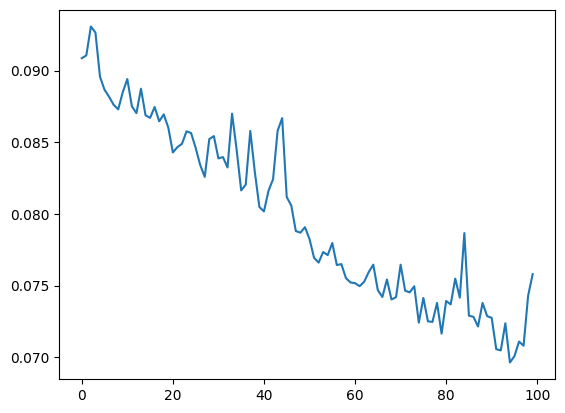

In [30]:
# plotting history
history_df = pd.DataFrame(history.history)
# using pandas plot
history_df['loss'].plot()